### Explore data

In [2]:
from tqdm import tqdm
import numpy as np

##### FWD

In [57]:
root = 'data/'

for filename in os.listdir(root):
    with open(root + filename) as file:
        train = [line.rstrip('\n') for line in file]

    tr_total, tr_unique, max_len = 0, 0, 0
    all_lens = []
    for line in tqdm(train):
        splitted = line.split('|')
        number, examples = splitted[0], splitted[1]
        examples = examples.split('\t')
        for el in examples:
            len_now = len(el.split(' '))
            if len_now > max_len:
                max_len = len_now
            all_lens.append(len_now)

        tr_total += int(number)
        tr_unique += 1


    print('Total examples generated in ' + filename, f'{tr_total:,}')
    print('Unique examples fed to model in ' + filename, f'{tr_unique:,}')
    print('Max len in ' + filename, max_len)
    print('Mean len in ' + filename, np.mean(all_lens))
    print('-' * 100)

100%|██████████| 9986/9986 [00:00<00:00, 192828.69it/s]


Total examples generated in prim_fwd.valid 1,558,675
Unique examples fed to model in prim_fwd.valid 9,985
Max len in prim_fwd.valid 505
Mean len in prim_fwd.valid 36.8164747120681
----------------------------------------------------------------------------------------------------
Total examples generated in prim_fwd.test 1,237,312
Unique examples fed to model in prim_fwd.test 9,986
Max len in prim_fwd.test 506
Mean len in prim_fwd.test 36.28840376527138
----------------------------------------------------------------------------------------------------


100%|██████████| 45339899/45339899 [04:06<00:00, 184269.46it/s]


Total examples generated in prim_fwd.train 112,106,299
Unique examples fed to model in prim_fwd.train 45,339,899
Max len in prim_fwd.train 510
Mean len in prim_fwd.train 39.564734070362064
----------------------------------------------------------------------------------------------------


### Results and metrics

In [3]:
import seaborn as sns
sns.set()
import os

In [4]:
root = '../dumped/emb_2301/'

runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/emb_2301/188513/train.log


In [5]:
root = '../dumped/pos_emb_0202/'

#runs = []
for filename in os.listdir(root)[:2]:
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/pos_emb_0202/239415/train.log
../dumped/pos_emb_0202/194320/train.log


In [6]:
root = '../dumped/seq_rel_att_0202/'

#runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)
    break
    

../dumped/seq_rel_att_0202/194322/train.log


In [7]:
root = '../dumped/tree_rel_att_0303/'

#runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    if '257752' not in run_name:
        runs.append(run_name)

../dumped/tree_rel_att_0303/236678/train.log
../dumped/tree_rel_att_0303/232589/train.log
../dumped/tree_rel_att_0303/232595/train.log
../dumped/tree_rel_att_0303/257752/train.log
../dumped/tree_rel_att_0303/232596/train.log
../dumped/tree_rel_att_0303/236679/train.log


In [8]:
root = '../dumped/tree_pos_enc_1204/'

#runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/tree_pos_enc_1204/262944/train.log
../dumped/tree_pos_enc_1204/261725/train.log
../dumped/tree_pos_enc_1204/261726/train.log
../dumped/tree_pos_enc_1204/262369/train.log
../dumped/tree_pos_enc_1204/262367/train.log
../dumped/tree_pos_enc_1204/263222/train.log


In [35]:
'''root = '../dumped/pos_emb_seq_rel_att_0202/'

#runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)'''

"root = '../dumped/pos_emb_seq_rel_att_0202/'\n\n#runs = []\nfor filename in os.listdir(root):\n    run_name = root + filename + '/train.log'\n    print(run_name)\n    runs.append(run_name)"

In [12]:
import datetime
import json

is_end=False

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            if len(time) == 1:     # day num
                line_split = line.split()
                day, time = line_split[5], line_split[7]
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = int(day) * 24 + (time.hour * 60 + time.minute) / 60
            else:
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = (time.hour * 60 + time.minute) / 60
            #if time > 70:
            #    is_end=True
            #    break 
            
            whole_dict['time'].append(time)
            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])
    runs_dict[name.split('/')[3]] = whole_dict

In [13]:
#runs_dict.pop('197594')
#runs_dict.pop('197612')
#runs_dict.pop('197593')
#runs_dict.pop('195850')
#runs_dict.pop('195286')
#runs_dict.pop('197641')

#runs_dict.pop('197641')   # BS 256
#runs_dict.pop('198206')   # BS 256 & lr=0.001
#runs_dict.pop('194321')   # seqrel 32
#runs_dict.pop('195287')   # seq rel 250 NUM-2',  --- сдвинут по времени
#runs_dict.pop('195286')   # pos emb NUM-2'       --- сдвинут по времени




names = {'188513':'emb',
         '194320':'pos emb',
         '194321':'seqrel att 32',
         '194322':'seqrel att 250',
         '194323':'pos emb + seqrel 32',
         '194324':'pos emb + seqrel 250',
         '195286':'pos emb NUM-2 Failed',
         '195287':'seq rel 250 NUM-2 Failed',
         '195850':'pos emb NUM-3',
         '195851':'seq rel 250 NUM-3',
         '197797':'1',
         '197641':'BS 256',
         '198206':'BS 256 & lr=0.001',
         '204657':'pos emb NUM-2',
         '204694':'seq rel 250 NUM-2',
         #'232394':'tree rel mult1 FULL',
         #'232478':'tree rel mult2 FULL',
         '232589':'tree rel mult2 2k',
         '232595':'tree rel mult2 2k + DECPOS',
         '232596':'tree rel mult1 2k',
         '236678':'tree rel mult2 2k + DECPOS NUM2',
         '236679':'tree rel mult2 10k + DECPOS',
         '239415':'pos emb 400ep',
         '238443':'seqrel att 250 400ep',
         '261725':'tree pos enc w16',
         '261726':'tree pos enc w32',
         '262367':'tree pos enc w8',
         '262369':'tree pos enc w16 NO DECPOS',
         '262944':'tree pos enc w16 NUM2',
         '263222':'tree pos enc w32 NUM2'
        }

Количество эпох каждой модели:

In [14]:
for key_1 in runs_dict.keys():
    for key_2 in runs_dict[key_1].keys():
        print(key_1, '\t', len(runs_dict[key_1][key_2]), '\t', names[key_1])
        break

188513 	 375 	 emb
239415 	 38 	 pos emb 400ep
194320 	 362 	 pos emb
194322 	 253 	 seqrel att 250
236678 	 399 	 tree rel mult2 2k + DECPOS NUM2
232589 	 165 	 tree rel mult2 2k
232595 	 218 	 tree rel mult2 2k + DECPOS
232596 	 172 	 tree rel mult1 2k
236679 	 345 	 tree rel mult2 10k + DECPOS
262944 	 176 	 tree pos enc w16 NUM2
261725 	 400 	 tree pos enc w16
261726 	 400 	 tree pos enc w32
262369 	 53 	 tree pos enc w16 NO DECPOS
262367 	 118 	 tree pos enc w8
263222 	 127 	 tree pos enc w32 NUM2


Если надо, то режем все по 275:

In [19]:
#for key_1 in runs_dict.keys():
#    for key_2 in runs_dict[key_1].keys():
#        runs_dict[key_1][key_2] = runs_dict[key_1][key_2][:275]

### GROUPED

In [20]:
def return_grouped_df(runs_dict, runs_nums):
    new_dict = {}
    for run in runs_nums:
        for key in runs_dict[run].keys():
            if key in new_dict.keys():
                new_dict[key].extend(runs_dict[run][key])
            else:
                new_dict[key] = runs_dict[run][key]
    
    return pd.DataFrame(new_dict)

In [21]:
import pandas as pd

pos_emb_runs = ['194320', '204657', '195850']
pos_emb_df = return_grouped_df(runs_dict, pos_emb_runs)

seq_rel_att_runs = ['194322', '204694', '195851']
seq_rel_att_df = return_grouped_df(runs_dict, seq_rel_att_runs)

In [22]:
needed = ['valid_prim_fwd_acc', 'valid_prim_fwd_xe_loss', 'test_prim_fwd_xe_loss', 'test_prim_fwd_acc']

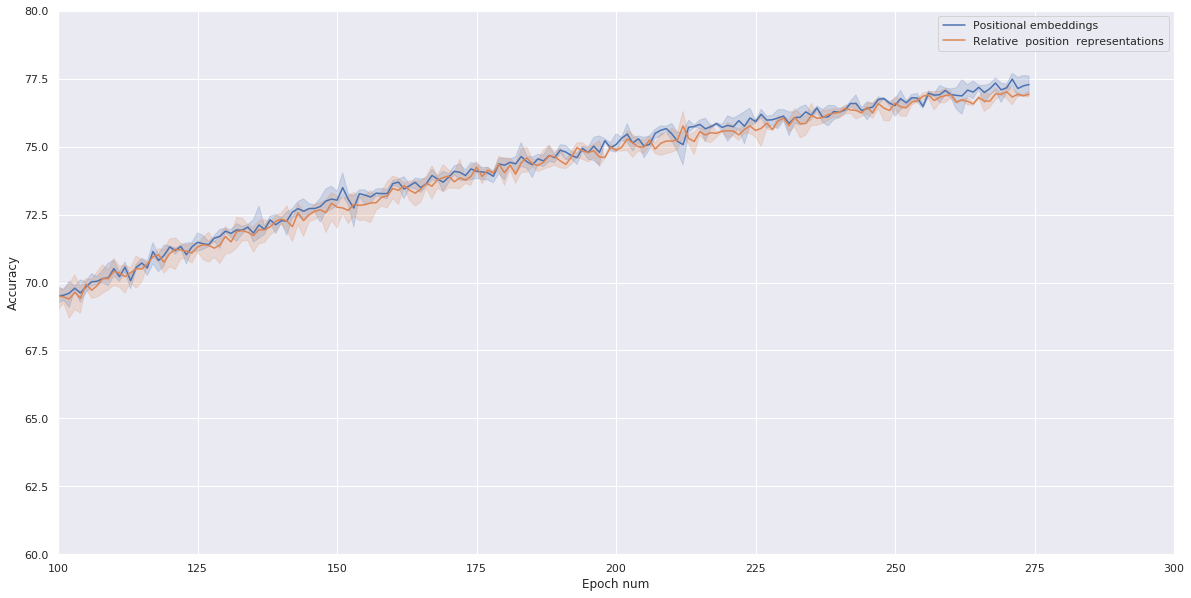

KeyboardInterrupt: 

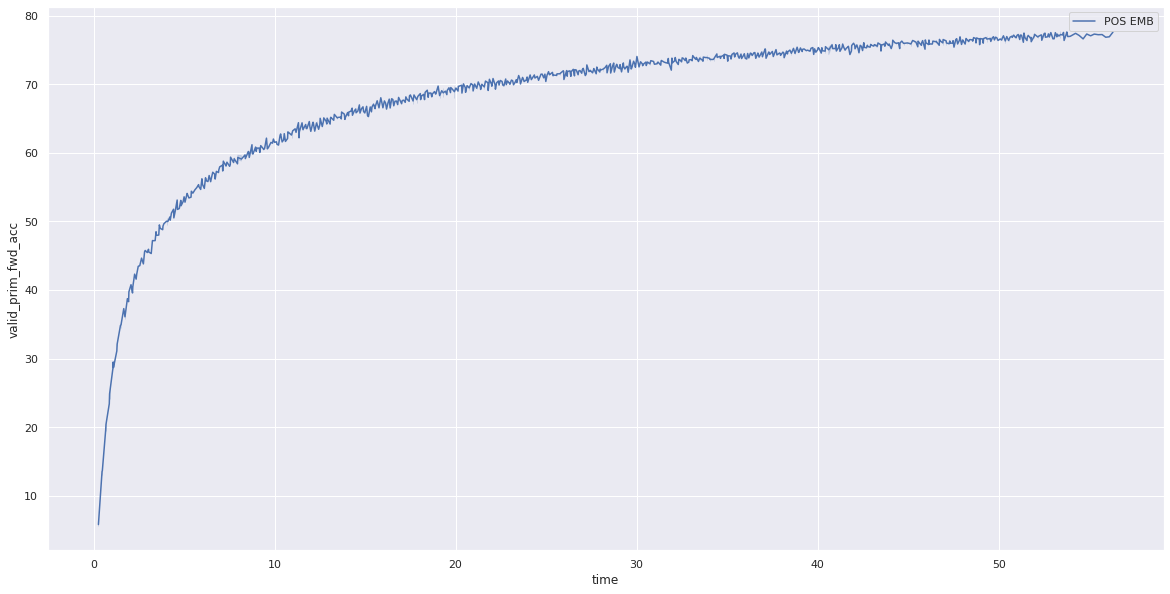

In [27]:
import matplotlib.pyplot as plt

for key in needed:
    ### epoch
    plt.figure(figsize=(20,10))
    sns.lineplot(data=pos_emb_df, x='epoch', y=key, label='Positional embeddings')
    sns.lineplot(data=seq_rel_att_df, x='epoch', y=key, label='Relative  position  representations')
    # accuracy limits 
    plt.xlim(100, 300)
    plt.ylim(60, 80)
    #plt.title('Validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch num')
    
    plt.legend()
    plt.show()
    
    ### time
    plt.figure(figsize=(20,10))
    sns.lineplot(data=pos_emb_df, x='time', y=key, label='POS EMB')
    sns.lineplot(data=seq_rel_att_df, x='time', y=key, label='SEQ REL ATT 250 encoder')
    plt.title(key)
    plt.legend()
    plt.show()

### USUAL

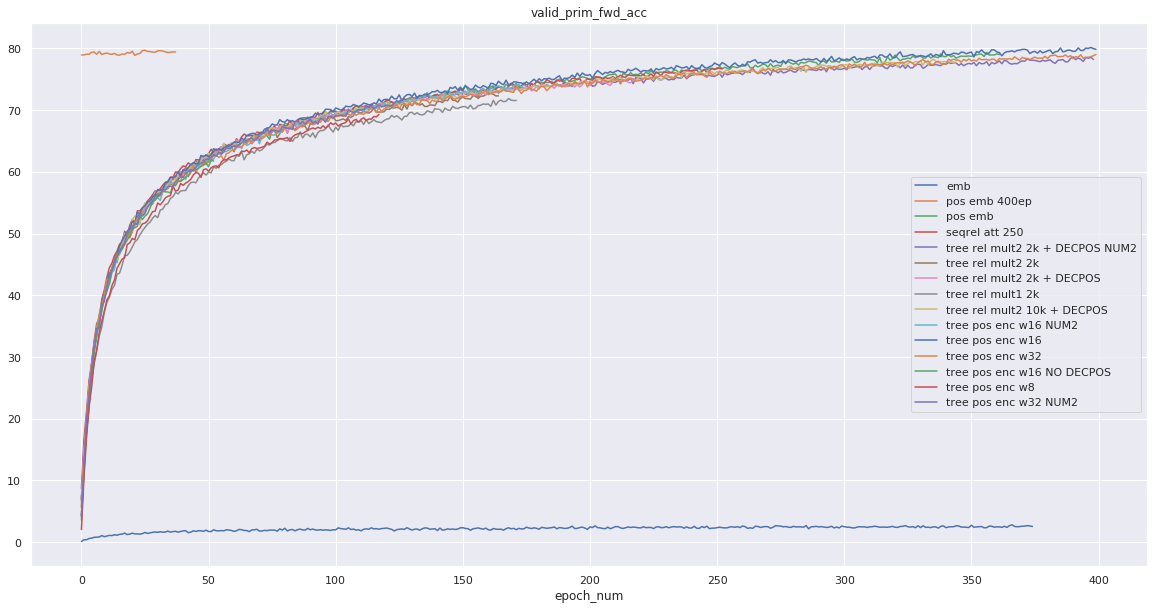

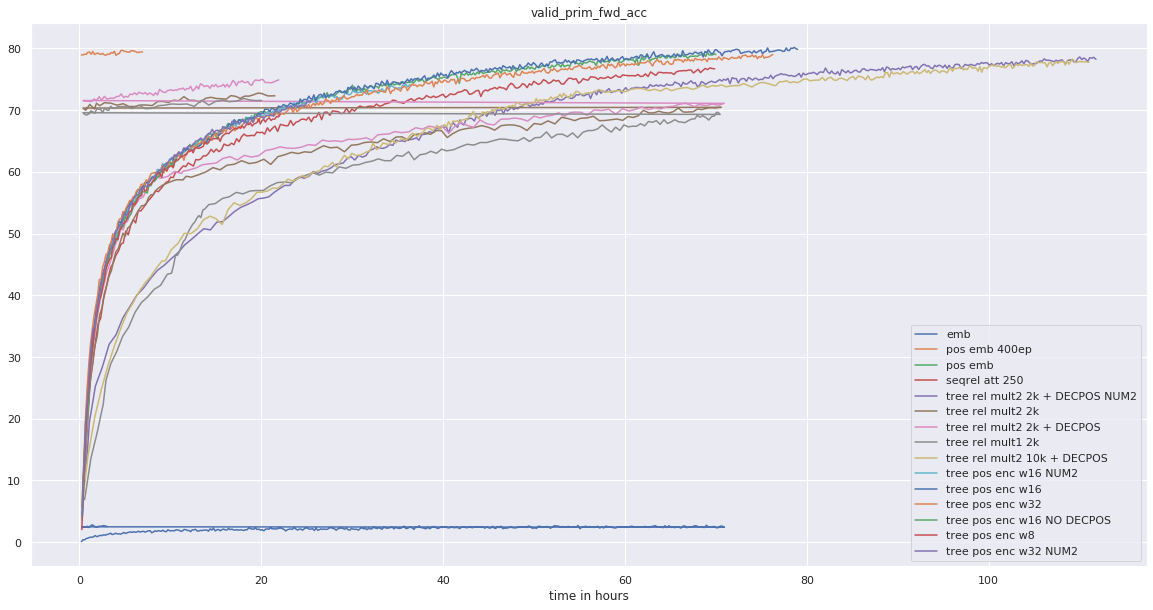

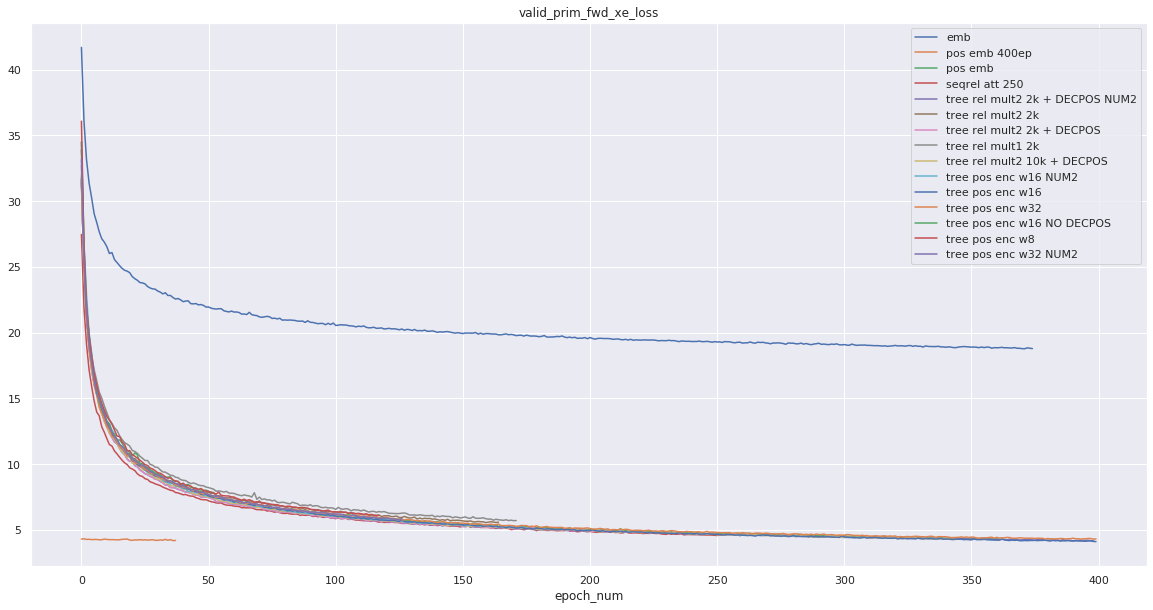

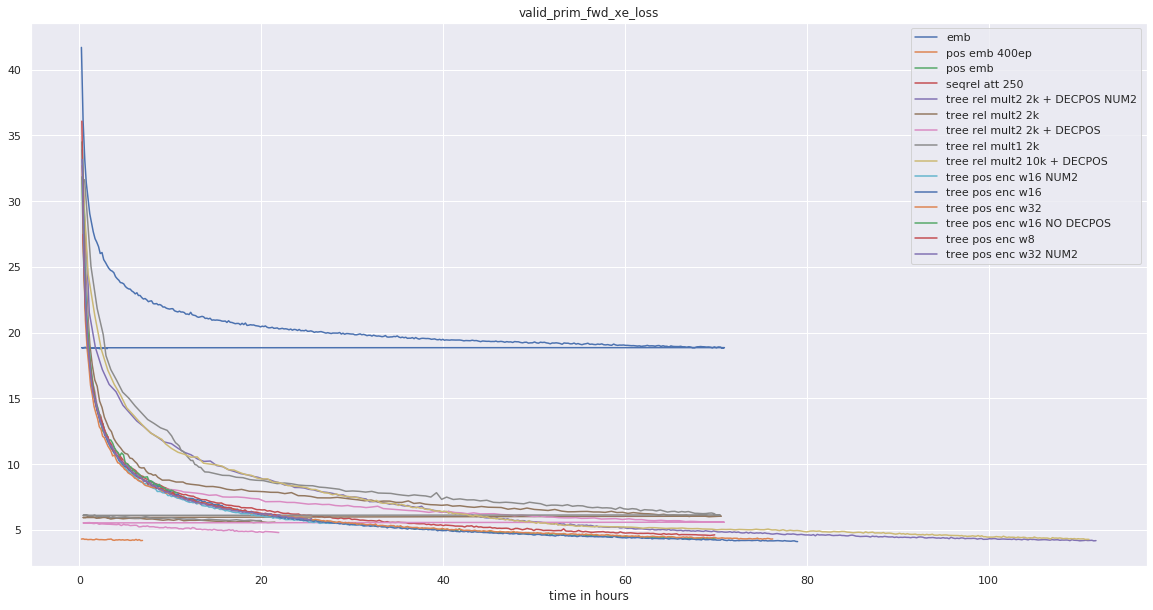

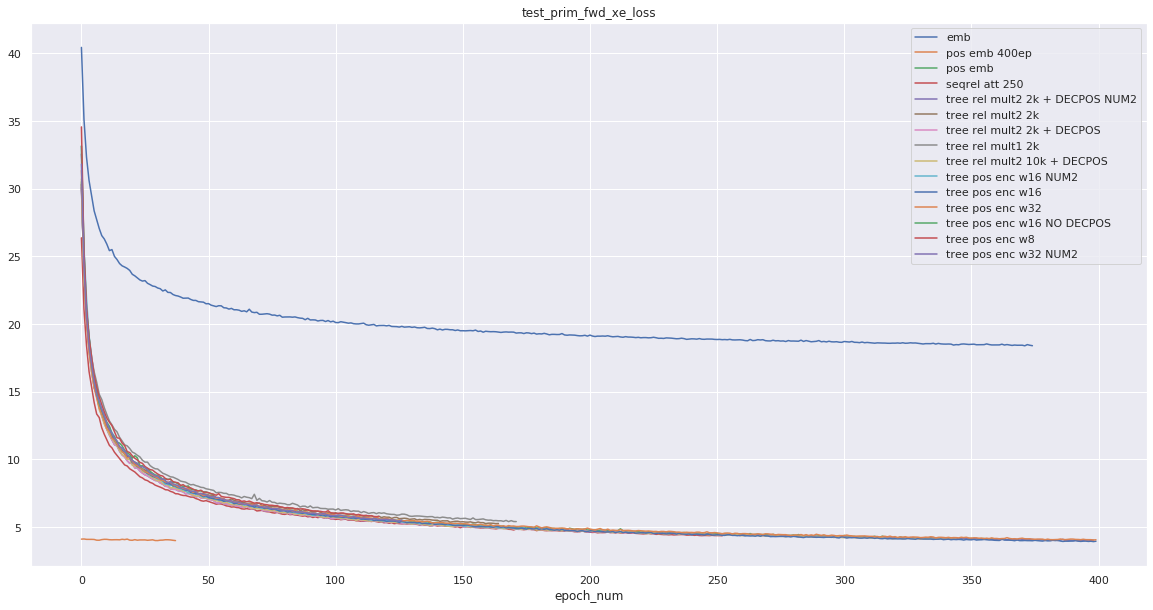

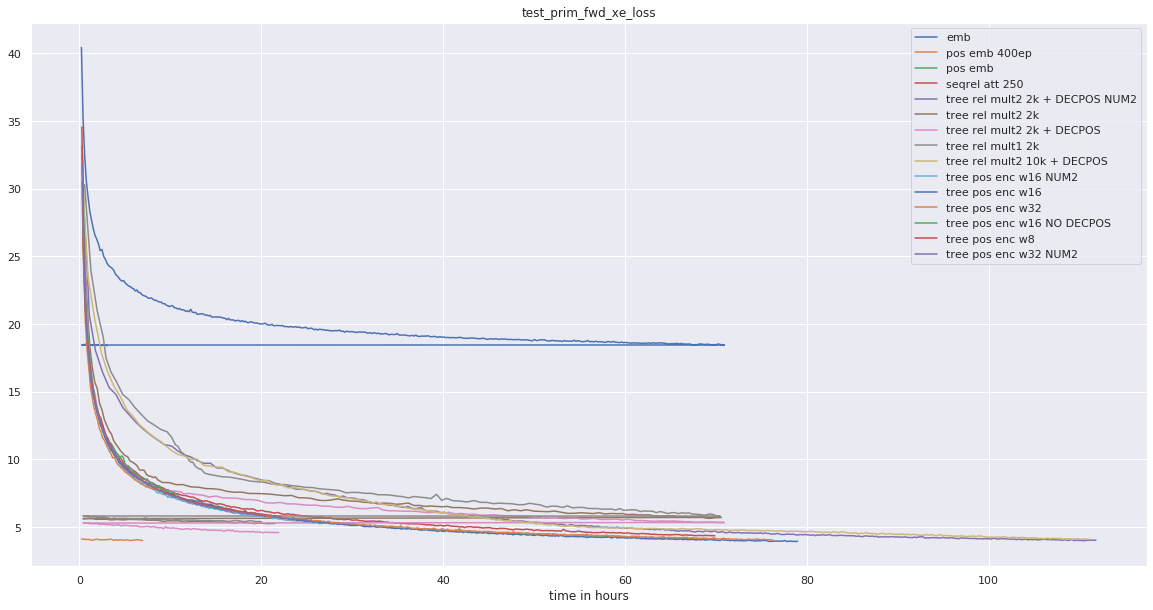

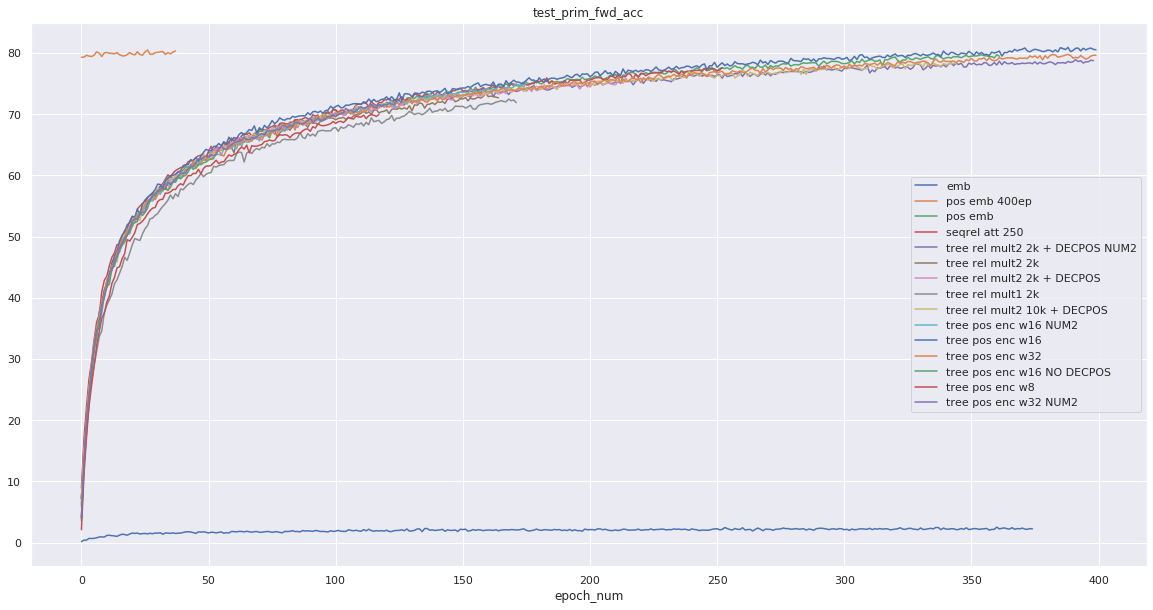

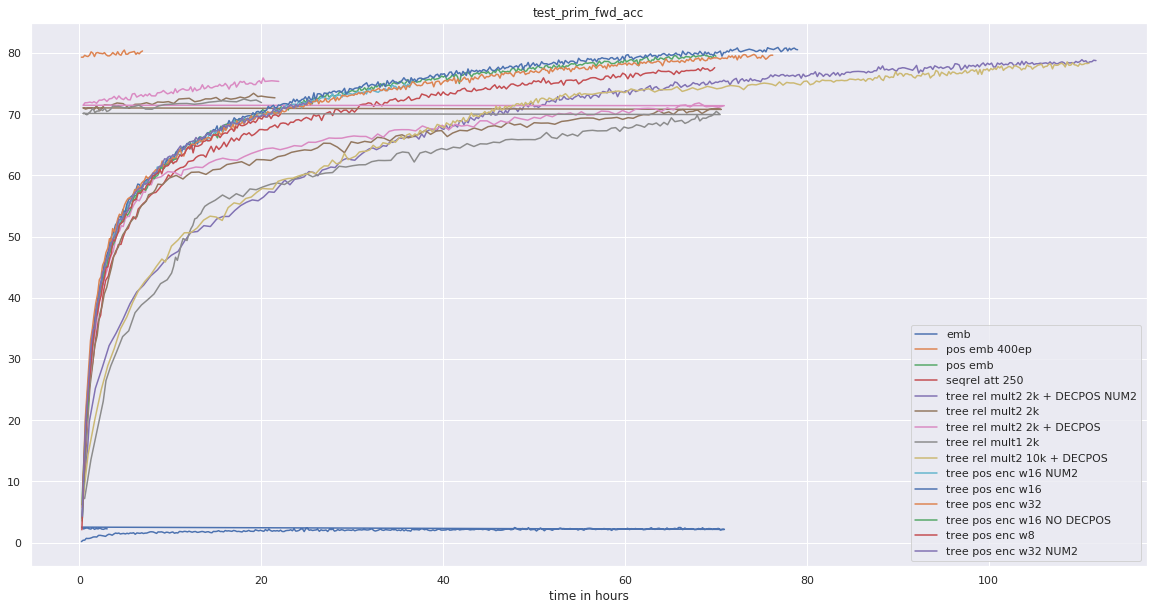

In [15]:
import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_acc', 'valid_prim_fwd_xe_loss', 'test_prim_fwd_xe_loss', 'test_prim_fwd_acc']
for key in needed:
    plt.figure(figsize=(20,10))
    for run in runs_dict.keys():
        plt.plot(
            runs_dict[run]['epoch'],
            runs_dict[run][key], 
            label=names[run]
        )
        #plt.xlim(200, 300)
        #plt.ylim(70, 80)
        plt.xlabel('epoch_num')
        plt.title(key)
        plt.legend()
    
    plt.show()
    
    plt.figure(figsize=(20,10))
    for run in runs_dict.keys():
        plt.plot(
            runs_dict[run]['time'],
            runs_dict[run][key],
            label=names[run]
        )
        plt.xlabel('time in hours')
        plt.title(key)
        plt.legend()
            
    plt.show()

In [1]:
'''import datetime
import json

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            time = datetime.datetime.strptime(time, '%H:%M:%S')
            time = (time.hour * 60 + time.minute) / 60
            whole_dict['time'].append(time)

            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])   
    runs_dict[name.split('/')[2]] = whole_dict'''

"import datetime\nimport json\n\nruns_dict = {}\n\nfor name in runs:\n    file = open(name)\n    lines = [line.rstrip('\n') for line in file]\n    whole_dict = {'time':[]}\n    for line in lines:\n        if '__log__' in line:\n            time = line.split()[5]\n            time = datetime.datetime.strptime(time, '%H:%M:%S')\n            time = (time.hour * 60 + time.minute) / 60\n            whole_dict['time'].append(time)\n\n            json_line = json.loads(line[line.find('{'):])\n            for key in json_line:\n                if key not in whole_dict:\n                    whole_dict[key] = []\n                whole_dict[key].append(json_line[key])   \n    runs_dict[name.split('/')[2]] = whole_dict"

In [2]:
'''import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_beam_acc', 'test_prim_fwd_beam_acc']
for key in whole_dict:
    for run in runs_dict.keys():
        if key in needed:
            print(key, runs_dict[run][key])'''

"import matplotlib.pyplot as plt\n\n\nneeded = ['valid_prim_fwd_beam_acc', 'test_prim_fwd_beam_acc']\nfor key in whole_dict:\n    for run in runs_dict.keys():\n        if key in needed:\n            print(key, runs_dict[run][key])"

### working with beam search evaluation

In [4]:
root = '../dumped/eval_pos_emb/'

runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/eval_pos_emb/240117/train.log
../dumped/eval_pos_emb/239470/train.log
../dumped/eval_pos_emb/241786/train.log
../dumped/eval_pos_emb/238212/train.log


In [5]:
root = '../dumped/eval_seq_rel_att/'
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/eval_seq_rel_att/240118/train.log
../dumped/eval_seq_rel_att/238276/train.log
../dumped/eval_seq_rel_att/241787/train.log
../dumped/eval_seq_rel_att/239471/train.log


In [6]:
root = '../dumped/eval_tree_rel_att/'
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/eval_tree_rel_att/257866/train.log
../dumped/eval_tree_rel_att/257746/train.log


In [7]:
root = '../dumped/eval_pos_emb_nodups/'
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/eval_pos_emb_nodups/261091/train.log


In [8]:
root = '../dumped/eval_seq_rel_att_nodups/'
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/eval_seq_rel_att_nodups/261092/train.log


In [9]:
root = '../dumped/eval_tree_rel_att_nodups/'
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/eval_tree_rel_att_nodups/261093/train.log


In [10]:
import datetime
import json

is_end=False

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    all_eval_acc = []
    for line in lines:
        if 'equations were evaluated correctly.' in line:
            solved, total = line.split()[7].split('/')
            accuracy = int(solved)/int(total)
            # print(accuracy)
            all_eval_acc.append(accuracy)  
                
    runs_dict[name.split('/')[3]] = all_eval_acc

In [ ]:
261725
261726

In [12]:
names = {'238212':'pos emb',
         '239470':'pos emb my_data',
         '240117':'pos emb 400ep my_data',
         '241786':'pos emb 400ep',
         '238276':'seqrel att 250',
         '239471':'seqrel att 250 my_data',
         '240118':'seqrel att 250 400ep my_data',
         '241787':'seqrel att 250 400ep',
         '257746':'tree 285ep? 2k DECPOS',
         '257866':'tree 400ep 2k DECPOS NUM2',
         '261091':'pos emb nodups 400ep',          # check 400 ep
         '261092':'seqrel att 250 nodups 400ep',   # check 400 ep
         '261093':'treerel att 2k DECPOS nodups 400ep'  # check 400 ep
        }

In [13]:
### print results in readable dataframe

import pandas as pd

res_df = pd.DataFrame(columns=['pos emb', 'seqrel att 250', 'tree rel att 2k DECPOS'])
for run in runs_dict:
    acc = runs_dict[run]
    
    if 'pos emb' in names[run]:
        col = 'pos emb'
    elif 'seqrel att 250' in names[run]:
        col = 'seqrel att 250'
    elif 'tree' in names[run]:
        col = 'tree rel att 2k DECPOS'
    
    if '400ep' in names[run] and 'nodups' in names[run]:
        row = '400 ep + nodups'
    elif '400ep' in names[run]:
        row = '400 ep'
    #elif 'my_data' in names[run]:
    #    row = 'my data'
    #    continue
    else:
        #row = 'base'
        continue
    
    for i in range(len(acc)):
        acc[i] = round(acc[i], 4)
    res_df.loc[row, col] = acc
       

res_df

,pos emb,seqrel att 250,tree rel att 2k DECPOS
400 ep,"[0.877, 0.8808]","[0.8758, 0.8794]","[0.8726, 0.8762]"
400 ep + nodups,"[0.8057, 0.8072]","[0.8013, 0.8022]","[0.7976, 0.7988]"


### beam search w 10; accuracy